In [1]:
# statndard imports
from drn_interactions.load import get_drug_groups
from drn_interactions.drug import load_drug_data, DrugResponders, population_raster

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
%load_ext autoreload
%autoreload 2

c:\Users\roryl\.conda\envs\drn38\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Data Set

In [2]:
spikes, clusters = load_drug_data()
display(spikes.head(3))    # spikes data
display(clusters.head(3))  # clusters data

,neuron_id,bin,counts,drug,block
0,1011,-600,6,cit,pre
1,1011,-599,7,cit,pre
2,1011,-598,7,cit,pre


,neuron_id,drug,wf_3,session_name
0,1011,cit,sir,hamilton_10
1,1013,cit,sr,hamilton_10
2,1014,cit,sir,hamilton_10


In [3]:
display(get_drug_groups().sample(4))     # show recording sessions

num_sessions = clusters[["session_name", "drug"]].drop_duplicates().groupby("drug").apply(len).to_frame("Number of sessions")
num_neurons = clusters.groupby("drug").apply(len).to_frame("Number of Neurons")
display(num_sessions.join(num_neurons))  # Show N

,session_name,group_name,experiment_name,drug
8,hamilton_10,acute_cit,HAMILTON,cit
11,hamilton_09,acute_cit,HAMILTON,cit
10,hamilton_04,acute_cit,HAMILTON,cit
9,hamilton_03,acute_sal,HAMILTON,sal


,Number of sessions,Number of Neurons
drug,,
cit,7,155
sal,9,256


# Define Responders

In [10]:
# model
mod = DrugResponders()
display(mod.get_anova(spikes, z=False))                                         # anova: no clusters
anova, coefs = mod.get_anova(spikes, clusters, z=False)                         # anova: with clusters
unit_responders = mod.get_responders(spikes, z=True, abs_diff_thresh=0.2)       # unit post hocs


display(anova.round(3))
display(coefs.round(3))
display(unit_responders.round(3).head(3))  # examples units

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,drug,0.430,1,340,0.430,19.988,0.0,0.056,NaN
1,block,4.404,1,340,4.404,22.673,0.0,0.063,1.0
2,Interaction,3.882,1,340,3.882,19.988,0.0,0.056,NaN


boundary (singular) fit: see help('isSingular') 

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Using original model contrasts, orthogonality not guaranteed)


,effect,NumDF,DenomDF,F-stat,P-val,Sig
0,block,1,335.869,22.865,0.000,***
1,drug,1,336.915,20.710,0.000,***
2,neurontype,2,336.915,19.924,0.000,***
3,block * drug,1,335.869,21.802,0.000,***
4,neurontype * block,2,335.869,20.974,0.000,***
5,neurontype * drug,2,336.915,4.328,0.014,*
6,neurontype * block * drug,2,335.869,4.556,0.011,*


,index,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
0,(Intercept),0.104,0.020,0.189,0.043,335.884,2.431,0.016,*
1,post,-0.157,-0.283,-0.031,0.064,335.869,-2.435,0.015,*
2,cit,0.397,0.259,0.536,0.071,335.884,5.633,0.000,***
3,sir,-0.162,-0.282,-0.041,0.061,335.884,-2.634,0.009,**
4,ff,-0.142,-0.314,0.031,0.088,335.884,-1.608,0.109,
5,post * cit,-0.596,-0.803,-0.389,0.106,335.869,-5.642,0.000,***
6,post * sir,0.242,0.062,0.423,0.092,335.869,2.638,0.009,**
7,post * ff,0.212,-0.046,0.471,0.132,335.869,1.611,0.108,
8,cit * sir,-0.273,-0.453,-0.092,0.092,335.884,-2.959,0.003,**
9,cit * ff,-0.066,-0.405,0.274,0.173,335.884,-0.378,0.706,


,neuron_id,drug,n_pre,n_post,Mean_pre,Mean_post,Diff,U,p,sig
0,1011,cit,600.0,1199.0,0.267,-0.134,-0.401,428327.0,0.000,True
1,1013,cit,600.0,1199.0,0.804,-0.402,-1.207,613184.5,0.000,True
2,1014,cit,600.0,1199.0,0.145,-0.073,-0.218,375159.5,0.043,True


### Visulize Results

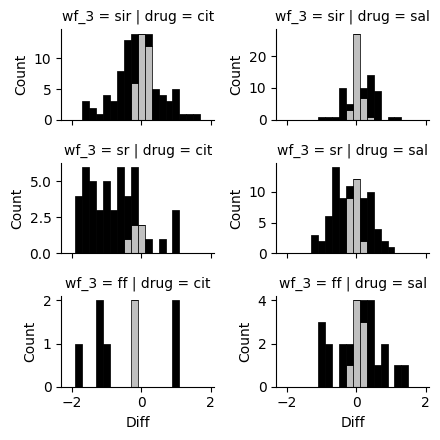

C:\Users\roryl\AppData\Local\Temp\ipykernel_35936\1270962163.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f_cit.show()
C:\Users\roryl\AppData\Local\Temp\ipykernel_35936\1270962163.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f_sal.show()


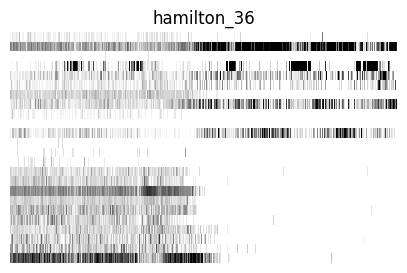

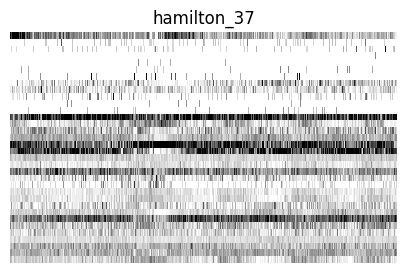

In [18]:
g = mod.plot_responders(unit_responders, clusters, bins=np.arange(-2.1, 2.1, 0.2), height=1.5, aspect=1.5)
plt.show()

ax = population_raster("hamilton_36", clusters=clusters, tfidf=True)
f_cit = ax.get_figure()
f_cit.show()

ax = population_raster("hamilton_37", clusters=clusters, tfidf=True)
f_sal = ax.get_figure()
f_sal.show()


# Way

In [19]:
# data set

spikes, clusters = load_drug_data(block="way")
display(spikes.head(3))    # spikes data
display(clusters.head(3))  # clusters data


,neuron_id,bin,counts,drug,block
0,1052,-600,0,cit,pre
1,1052,-599,0,cit,pre
2,1052,-598,0,cit,pre


,neuron_id,drug,wf_3,session_name
0,1011,cit,sir,hamilton_10
1,1013,cit,sr,hamilton_10
2,1014,cit,sir,hamilton_10


In [20]:
display(get_drug_groups().sample(4))     # show recording sessions

num_sessions = clusters[["session_name", "drug"]].drop_duplicates().groupby("drug").apply(len).to_frame("Number of sessions")
num_neurons = clusters.groupby("drug").apply(len).to_frame("Number of Neurons")
display(num_sessions.join(num_neurons))  # Show N

,session_name,group_name,experiment_name,drug
23,acute_11,acute_saline,CITWAY,sal
20,acute_01,acute_citalopram,CITWAY,cit
8,hamilton_10,acute_cit,HAMILTON,cit
12,hamilton_31,acute_cit,HAMILTON,cit


,Number of sessions,Number of Neurons
drug,,
cit,7,155
sal,9,256


## Statistical Modeling of Drug Responsivity

In [21]:
# model
mod = DrugResponders()
display(mod.get_anova(spikes, z=False))                                         # anova: no clusters
anova, coefs = mod.get_anova(spikes, clusters, z=False)                         # anova: with clusters
unit_responders = mod.get_responders(spikes, z=True, abs_diff_thresh=0.2)       # unit post hocs


display(anova.round(3))
display(coefs.round(3))
display(unit_responders.round(3).head(3))  # examples units

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,drug,720.650,1,282,720.650,14.087,0.000,0.048,NaN
1,block,22.997,1,282,22.997,9.701,0.002,0.033,1.0
2,Interaction,31.666,1,282,31.666,13.358,0.000,0.045,NaN


SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Using original model contrasts, orthogonality not guaranteed)


,effect,NumDF,DenomDF,F-stat,P-val,Sig
0,block,1,277.987,29.294,0.000,***
1,drug,1,295.691,33.729,0.000,***
2,neurontype,2,286.988,29.244,0.000,***
3,block * drug,1,277.987,23.169,0.000,***
4,neurontype * block,2,277.986,8.799,0.000,***
5,neurontype * drug,2,286.988,12.484,0.000,***
6,neurontype * block * drug,2,277.986,4.597,0.011,*


,index,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
0,(Intercept),3.546,2.130,4.963,0.723,221.736,4.907,0.000,***
1,post,-0.066,-0.581,0.449,0.263,277.987,-0.252,0.801,
2,cit,-1.722,-3.589,0.145,0.953,313.584,-1.808,0.072,.
3,sir,-1.453,-3.407,0.501,0.997,221.739,-1.457,0.146,
4,ff,9.696,6.879,12.513,1.437,221.739,6.746,0.000,***
5,post * cit,-0.483,-1.338,0.372,0.436,277.986,-1.107,0.269,
6,post * sir,0.312,-0.399,1.022,0.363,277.987,0.860,0.391,
7,post * ff,-0.423,-1.448,0.601,0.523,277.987,-0.810,0.419,
8,cit * sir,1.982,-0.464,4.428,1.248,306.804,1.588,0.113,
9,cit * ff,-5.415,-9.447,-1.382,2.057,316.186,-2.632,0.009,**


,neuron_id,drug,n_pre,n_post,Mean_pre,Mean_post,Diff,U,p,sig
0,1052,cit,600.0,1199.0,-0.223,0.112,0.335,331200.0,0.000,True
1,1053,cit,600.0,1199.0,0.725,-0.363,-1.087,576617.5,0.000,True
2,1054,cit,600.0,1199.0,-0.047,0.023,0.070,354296.0,0.007,False


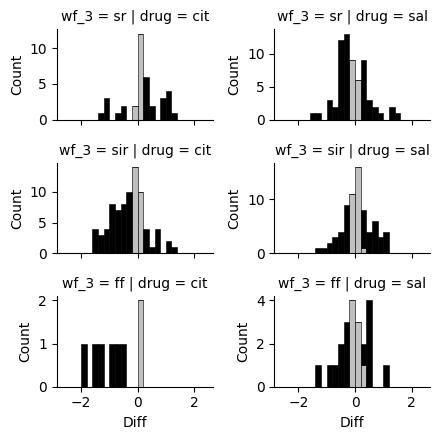

C:\Users\roryl\AppData\Local\Temp\ipykernel_35936\3618699557.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f_cit.show()
C:\Users\roryl\AppData\Local\Temp\ipykernel_35936\3618699557.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f_sal.show()


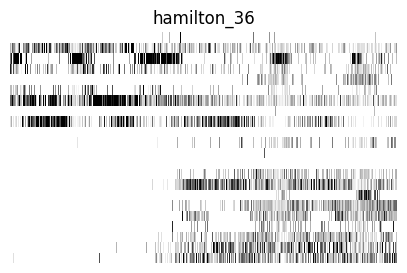

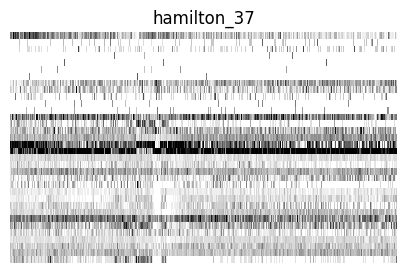

In [26]:
# visualize

g = mod.plot_responders(unit_responders, clusters, bins=np.arange(-2.6, 2.6, 0.2), height=1.5, aspect=1.5)
plt.show()

ax = population_raster("hamilton_36", block="way", clusters=clusters, tfidf=True)
f_cit = ax.get_figure()
f_cit.show()

ax = population_raster("hamilton_37", block="way", clusters=clusters, tfidf=True)
f_sal = ax.get_figure()
f_sal.show()
